In [1]:
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import time

In [2]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return y
def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [3]:
frequency=input()

W


# 读取需要数据

In [21]:
trdayfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\tradeday.csv'
stfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\ST.csv'
stand9500='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\stand.csv'
closep='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\closeprice.csv'
trdaydata=pd.read_csv(trdayfile,parse_dates=True,index_col=0)
u=trdaydata.index[0]
trdaydata=trdaydata.T
for i in range(len(trdaydata)):
    y=trdaydata.iloc[i]
    z=y[y==1].index
    if len(z)>250:
        if z[0]!=u:
                y[z[0]:z[250]]=0
        else:
            y=y
    elif len(z)==0:
        y=y
    else:
        y[z[0]:]=0
trdaydata=trdaydata.T
trdaydata0=dadjust(trdaydata)
stdata=pd.read_csv(stfile,parse_dates=True,index_col=0)
stdata0=dadjust(stdata)
stand00=pd.read_csv(stand9500,parse_dates=True,index_col=0)
stand500=dadjust(stand00)
closepr=pd.read_csv(closep,parse_dates=True,index_col=0)
closeprice=dadjust(closepr)
stfre=np.unique(stdata0.index)

# 日数据转化为周数据

In [5]:
for i in range(len(stfre)):
    tradeday0=trdaydata0.loc[stfre[i]]
    st0=stdata0.loc[stfre[i]]
    wstand500=stand500.loc[stfre[i]]
    #wcloseprice=closeprice.loc[stfre[i]]
    l=len(pd.DataFrame(st0).T)
    if i ==0:
        w_stand500=pd.DataFrame(wstand500).T
        tradeday=pd.DataFrame(tradeday0).T
        st=pd.DataFrame(st0).T
        #w_closeprice=pd.DataFrame(wcloseprice).T
    else:
        if l!=1:
            tradeday1=tradeday0[len(tradeday0)-1:len(tradeday0)]
            tradeday=tradeday.append(tradeday1)
            st1=st0[len(st0)-1:len(st0)]
            #wcloseprice1=wcloseprice[len(wcloseprice)-1:len(wcloseprice)]
            #w_closeprice=w_closeprice.append(wcloseprice1)
            st= st.append(st1)
            wstand5001= wstand500[len(wstand500)-1:len(wstand500)]
            w_stand500=w_stand500.append(wstand5001)
        else:
            tradeday2=pd.DataFrame(tradeday0).T
            tradeday=tradeday.append(tradeday2)
            st2=pd.DataFrame(st0).T
            st= st.append(st2)
            #wcloseprice2=pd.DataFrame(wcloseprice).T
            #w_closeprice=w_closeprice.append(wcloseprice2)
            wstand5002=pd.DataFrame(wstand500).T
            w_stand500=w_stand500.append(wstand5002)           

# 每日与周期收益率

In [6]:
rate500=(stand500-stand500.shift(1))/stand500.shift(1)
closerate=(closeprice-closeprice.shift(1))/closeprice.shift(1)
w_rate500=(w_stand500-w_stand500.shift(1))/w_stand500.shift(1)
w_rate500=w_rate500[1:]

In [7]:
file='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\'+input()+'.csv'

marketvalue


In [8]:
gronum=input()

100


In [9]:
data=pd.read_csv(file,parse_dates=True,index_col=0)
data0=dadjust(data)
data0=data0.astype(float)
fre=np.unique(data0.index)

In [10]:
dic={}
group={}
for i in range(len(fre)+1):
    tradeday0=tradeday.loc[fre[i-1]]
    dindex=tradeday0[tradeday0!=0].T.dropna().index
    ust=st.loc[fre[i-1]]
    ust=ust[ust!=1]
    d_gindex=ust[dindex].dropna().index
    data1=data0.loc[fre[i-1]]
    data1=data1[d_gindex]
    data1=data1.dropna().astype(float)
    data1=pd.DataFrame(data1)
    sdata=data1.apply(medianpeak).apply(nondimensionalize).sort_values(by=fre[i-1],ascending=False)
    l=len(sdata)
    if i ==0:
            dic[i]=0
    else:
        for j in range(int(gronum)):
            group[j]=sdata[round(((j)/int(gronum))*l):round(((j+1)/int(gronum))*l)].index
        dic[i]=copy.deepcopy(group)

In [12]:
ratefile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv'
errate11=pd.read_csv(ratefile,parse_dates=True,index_col=0)
errate1=dadjust(errate11)

In [13]:
mrate=np.zeros(len(fre)-1)
dicrate={}
grorate=np.zeros(int(gronum))
for j in range(int(gronum)):
    for i in range(len(fre)-1):
        mrate[i]=errate1[dic[i+1][j]].loc[fre[i+1]].mean()
    dicrate[j]= copy.deepcopy(mrate)
for key in dicrate:
    grorate[key]=dicrate[key].mean()

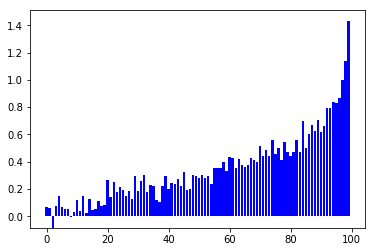

In [14]:
num=np.arange(len(grorate))
plt.bar(num,grorate, color = 'b')
plt.show()

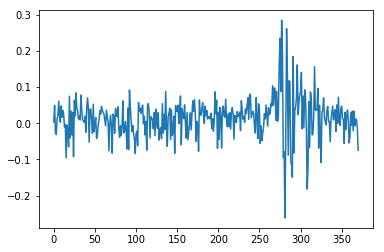

In [15]:
plt.plot(dicrate[99]/100)
plt.show()

In [16]:
ic=np.zeros(len(fre)-1)
for i in range(len(fre)-1):
    data2=data0.loc[fre[i]]
    icdata=data2[dic[i+1][0]].values
    icrate=errate1[dic[i+1][0]].loc[fre[i+1]].values/100
    ic[i]=np.corrcoef(icdata,icrate)[1][0]

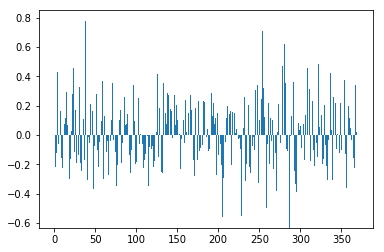

In [17]:
num2=np.arange(len(ic))
plt.bar(num2,ic) #排序ic
plt.show()

In [18]:
unitnet0=dicrate[99]-0.2
unitnet=unitnet0.cumsum()
unitnet=unitnet/100+1
w_rate=w_rate500.cumsum()+1

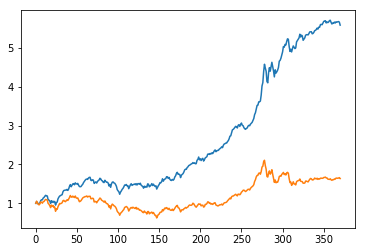

In [19]:
#%matplotlib notebook
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0],label='500')
plt.show()

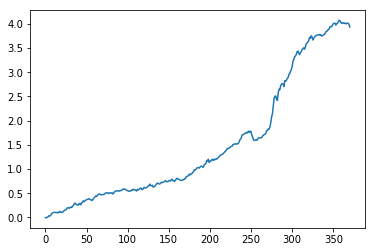

In [20]:
plt.plot(unitnet-w_rate.T.values[0],label='500')
plt.show()

In [177]:
'''import codecs
with open('C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv', 'w') as f:
    #f.write(codecs.BOM_UTF8)
    writer = csv.writer(f,lineterminator='\n')
    writer.writerow(trdaydata.T.index)
    writer.writerows(trdaydata.values)
'''